In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake-v0')

In [3]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    jList.append(j)
    rList.append(rAll)

In [4]:
print("Score over time: " +  str(sum(rList)/num_episodes))


Score over time: 0.421


In [5]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[3.29852705e-01 9.90879633e-04 1.62892210e-03 1.81109706e-03]
 [2.27897120e-04 5.83869761e-05 2.06250332e-04 2.22640550e-01]
 [8.35875901e-02 1.16438753e-03 1.93043209e-03 1.10482278e-03]
 [7.45026016e-06 5.09409686e-05 9.66830962e-04 1.67913941e-03]
 [4.26279986e-01 2.15256940e-04 2.15140159e-06 1.19827065e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.19189844e-02 2.12619393e-04 4.08915646e-04 2.78949831e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.41576102e-04 3.14826055e-04 1.72709174e-04 2.94511215e-01]
 [2.52881806e-04 4.66001215e-01 0.00000000e+00 1.23762678e-04]
 [5.72844934e-01 2.30534583e-04 1.22926184e-04 3.54547473e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.21482454e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.25216492e-01]
 [0.00000000e+00 0.00000000e+00 0.

In [40]:
import gym
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Lambda
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
env = gym.make('FrozenLake-v0')

In [107]:
tf.keras.backend.clear_session()

In [108]:
inputs1 = Input(shape=16)
W = Dense(4, kernel_initializer='uniform', activation='softmax')(inputs1)

sgd = optimizers.SGD(lr=0.1)

model = tf.keras.Model(inputs=inputs1, outputs=W)
model.summary()
model.compile(loss='mean_squared_error', optimizer=sgd)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 68        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Network
    while j < 99:
        j+=1
        #Choose an action by greedily (with e chance of random action) from the Q-network
        allQ = model.predict_on_batch(np.identity(16)[s:s+1])
        allQ = np.array(allQ)
        a = np.argmax(allQ, axis=1)
        if np.random.rand(1) < e:
            a[0] = env.action_space.sample()
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a[0])
        #Obtain the Q' values by feeding the new state through our network
        Q1 = model.predict_on_batch(np.identity(16)[s:s+1])
        #Obtain maxQ' and set our target value for chosen action.
        maxQ1 = np.max(Q1)
        targetQ = allQ
        targetQ[0,a[0]] = r + y*maxQ1
        #Train our network using target and predicted Q values
        l = model.train_on_batch(x=np.identity(16)[s:s+1], y=targetQ)
        rAll += r
        s = s1
        if d == True:
            #Reduce chance of random action as we train the model.
            e = 1./((i/50) + 10)
            break
    if i > 0 and i % 50 == 0:
        print("Percent of succesful episodes: " + str(sum(rList)/i * 100) + "%")
    jList.append(j)
    rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes * 100) + "%")

Percent of succesful episodes: 0.0%
Percent of succesful episodes: 0.0%
Percent of succesful episodes: 0.0%
Percent of succesful episodes: 0.0%
Percent of succesful episodes: 0.0%
Percent of succesful episodes: 0.0%
Percent of succesful episodes: 0.0%
Percent of succesful episodes: 0.0%
Percent of succesful episodes: 0.6666666666666667%
Percent of succesful episodes: 0.8%
Percent of succesful episodes: 1.090909090909091%
Percent of succesful episodes: 1.1666666666666667%
Percent of succesful episodes: 1.3846153846153846%
Percent of succesful episodes: 1.4285714285714286%
Percent of succesful episodes: 1.6%
Percent of succesful episodes: 1.625%
Percent of succesful episodes: 1.647058823529412%
Percent of succesful episodes: 1.6666666666666667%
Percent of succesful episodes: 1.5789473684210527%
Percent of succesful episodes: 1.6%
Percent of succesful episodes: 1.5238095238095237%
Percent of succesful episodes: 1.4545454545454546%
Percent of succesful episodes: 1.652173913043478%
Percent 

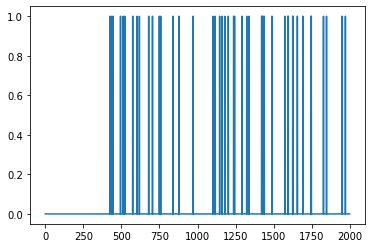

In [110]:
plt.plot(rList)

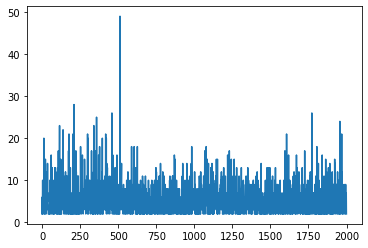

In [111]:
plt.plot(jList)